**TAREA 1**

**DAVID BALLESTER CLAUSELL**

ASIGNATURA DE BIOINFORMÁTICA. 4º DE BIOTECNOLOGÍA

Preparación del ambiente de computación

Para poder ejecutar los análisis de este cuaderno es necesario:

    Instalar BLAST.
    Descomprimir el archivo taxdb.btd.gz

Para hacerlo de forma automática desde R, disponemos en esta carpeta del pequeño script de BASH: preparar_ambiente.sh. Esta vez, sólo hace falta ejecutar el bloque siguiente, sin necesidad de salir del cuaderno:

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

### 1. INTRODUCCIÓN

El objetivo de este análisis es demostrar que las proteínas CHRM1, CHRM3 y CHRM7 aparecieron en el linaje del último ancestro común entre cordados y cnidarios.

Para ello, debemos encontrar proteínas homólogas a CHRM1, CHRM3 y CHRM7 en organismos que proceden del último ancestro común entre cordados y cnidarios (filums cnidarios, platelmintos, nemátodos, equinodermos y cordados), pero no debemos obtener proteínas homólogas a ellas en ctenóforos, poríferos, placozoa, hongos y plantas.

En este análisis me  voy a centrar solamente en estudiar posibles homologías de la proteína CHRM1. 

### 2. MÉTODOS

Voy a usar la base de datos de secuencias Swissprot, ya instalada en el entorno utilizado, para buscar homologías a la proteína CHRM1. He usado esta base de datos porque es una base de datos secundaria de secuencias de proteínas que contiene datos con un alto nivel de anotación.

Para realizarlo, utilizaré el algoritmo BLASTp (Altschul *et al.*, 1990). Éste me permitirá comparar la secuencia de mi proteína (*query*) con otras de la base de datos Swissprot y me permitirá encontrar, posiblemente, un dominio conservado de la misma. Primero haré un BLASTp individual fijando el valor umbral y, después, realizaré un BLASTp en serie, haciendo cada vez menos restrictivo el análisis y viendo como cambia la distribución taxonómica de las secuencias.

### 3. RESULTADOS

### BLASTp individual
Utilizo el algoritmo BLASTp para realizar una sola búsqueda usando un valor umbral E de 1.0e-100, que es muy restrictivo. Esta condición hará que obtengamos como resultado aquellas secuencias que tienen un alto grado de homología a nuestra secuencia.

In [20]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-100',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# Transformamos el resultado en un "data frame", una tabla en la que cada columna es una variable:

TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOut01)

[1] 29 11

In [21]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


La tabla de resultados incluye 29 secuencias encontradas, incluyendo la misma secuencia usada como *query*.

### BLASTp en serie
Ahora voy a repetir la búsqueda en blastp a diferentes valores E (de más restrictivos a menos). Esto me permitirá ir poco a poco ampliando el campo de posibles homologías, aunque con un menor porcentaje de identidad.


In [22]:
Valores_E_maximos <- c('1.0e-100', '1.0e-50', '1.0e-20', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

# La función lapply() aplicará una función (segundo argumento) sobre
# cada uno de los valores de la lista o vector indicados en el primer
# argumento (Valores_E_maximos, en este caso). La función que aplicamos
# la definimos entre llaves ("{}"). Incluye todos los pasos necesarios
# para obtener una tabla de resultados como la anterior.
Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **BLASTp** ejecutados. Podemos acceder a una tabla individual mediante los dobles corchetes:

In [23]:
tail(Lista_de_Tablas[[3]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
244,O02666.1,32.031,256,24,270,100,344,7.26e-22,9986,Oryctolagus cuniculus,rabbits & hares
245,P50407.1,33.333,180,42,219,99,271,7.29e-22,10141,Cavia porcellus,rodents
246,P41596.2,30.736,231,24,246,142,369,9.80e-22,7227,Drosophila melanogaster,flies
247,G3M4F8.1,28.500,200,34,228,46,240,1.25e-21,168631,Chilo suppressalis,moths
248,P30966.2,34.667,225,4,218,13,230,1.36e-21,10090,Mus musculus,rodents
249,P28285.2,30.890,191,24,213,225,411,2.57e-21,7227,Drosophila melanogaster,flies


Utilizaré la función `dim()` para conocer las dimensiones que tiene cada una de las tablas obtenidas. Con la función `sapply()` obtendré solamente el número de filas de cada tabla, que será igual al número de secuencias homólogas en cada búsqueda del blastp en serie.

In [24]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  29  37 249 249 485 577 647 682 730 774

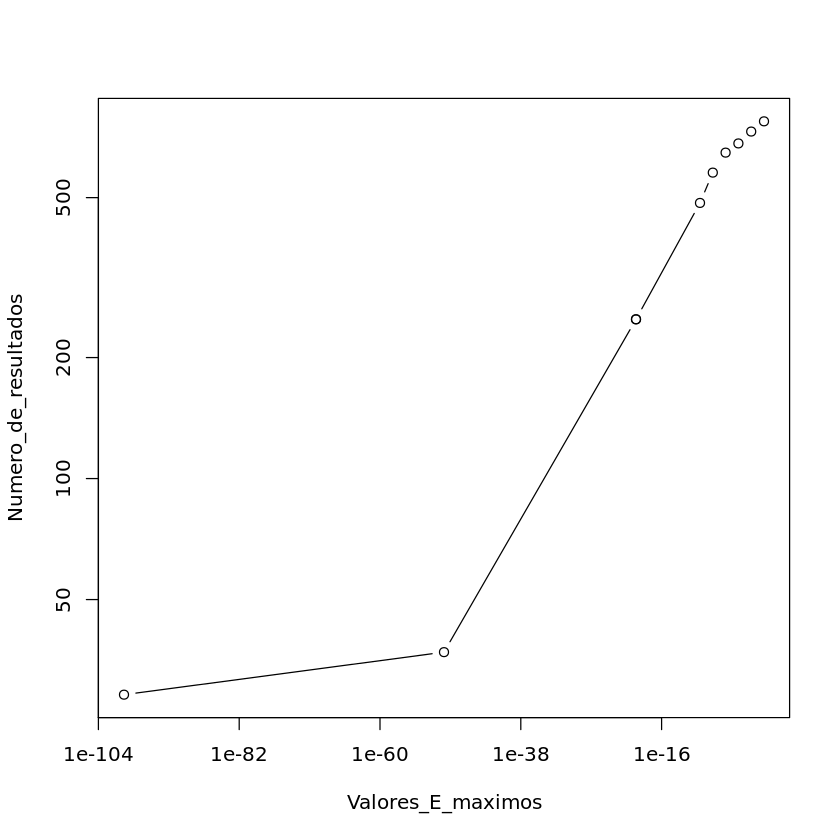

In [25]:
# En la representación gráfica, podemos usar escala logarítmica solamente
# en un eje ("log='x'"), en los dos, o en ninguno.
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

En la gráfica anterior se puede observar el aumento del número de resultados al usar valores E más altos (menos restrictivos).

Vamos a analizar la relación entre la longitud del alineamiento y el valor E de los resultados de la tabla número 10, ya que ésta contiene un mayor número de resultados y nos ayudará a encontrar homologías totales o parciales a nuestra proteína.

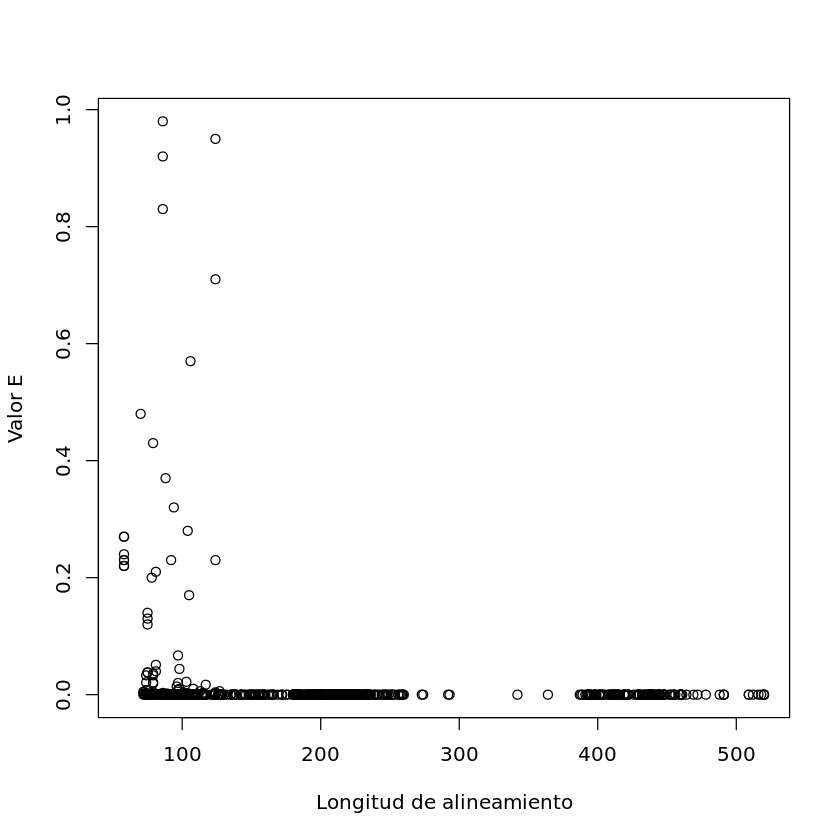

In [26]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

La proteína CHRM1 está compuesta por 460 aminoácidos. En la gráfica se observan algunas secuencias que tienen un alineamiento total con la proteína, pero también existen diferentes secuencias que tienen un alineamiento igual o menor a 100 aminoácidos. Éstas tienen una homología parcial con la proteína CHRM1. Podría deberse a un dominio de función conservada.

Ahora, voy a realizar un gráfico con segmentos para observar las posiciones de la proteína donde se están produciendo los alineamientos parciales.

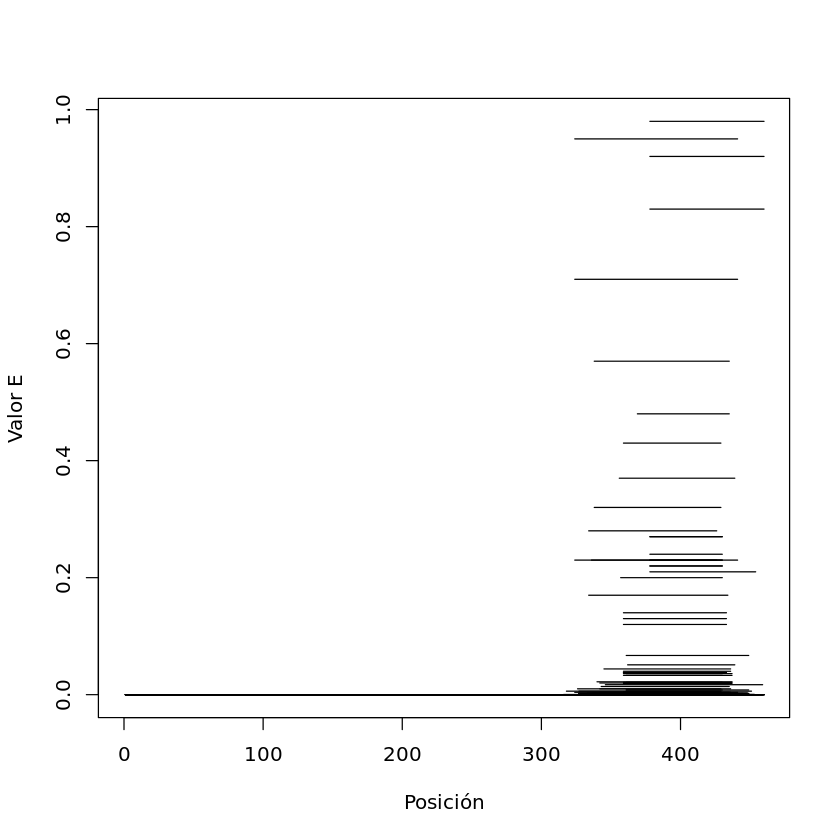

In [27]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, represento
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

En la gráfica anterior se puede observar que la homología obtenida con el valor de E menos estricto se encuentra aproximadamente entre las posiciones 320 y 450 de la proteína CHRM1. Por lo tanto, podría haber un dominio de función conservada entre estas posiciones. 

Por último, se puede explorar la distribución taxonómica de las secuencias obtenidas en cada búsqueda del BLASTp en serie. Se procederá a contar cuántas secuencias hay de cada grupo taxonómico. 


In [28]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds even-toed ungulates            primates             rodents 
                  2                   4                  13                  10 

[[2]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  6                  18                  16                   2 
even-toed ungulates               flies       frogs & toads          gastropods 
                 23                  12                   8                   2 
       grasshoppers        insectivores          marsupials               moths 
                  2                   2                   4                   5 
     

Las tablas anteriores hacen referencia a los resultados obtenidos en el BLASTp en serie realizado anteriormente en este script. Se puede apreciar que en todas las búsquedas realizadas, más acentuado en las que el valor E es más restrictivo, la mayoría de grupos taxonómicos en los que se ha encontrado secuencias homólogas a la proteína CHRM1 pertenecen al filo de los cordados. Aún ampliando el valor E, haciéndolo menos restrictivo, no se ha encontrado ninguna proteína homóloga a ella en ctenóforos, poríferos, placozoa, hongos y plantas.

La proteína CHRM1 es un receptor muscarínico de acetilcolina en humanos. Es posible que las secuencias proteicas que sean homólogas a ésta a valores E pequeños y con alineamientos más completos, tengan una función bastante conservada respecto a la proteína a estudio. Por este motivo, voy a repetir el recuento de grupos taxonómicos limitándolo a secuencias que superen o igualen los 400 nucleótidos de longitud:

In [29]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 400
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds even-toed ungulates            primates             rodents 
                  2                   4                  13                   8 

[[2]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   9                   4                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
                 10                   1                   3                   1 
       grasshoppers        insectivores          marsupials               moths 
                  0                   0                   1                   3 
     

### 4. DISCUSIÓN

La proteína CHRM1 es un receptor muscarínico de acetilcolina asociado a proteínas G que se encuentra en humanos. Viscardi *et al* (2021) afirman en su trabajo que los primeros receptores de acetilcolina debieron aparecer en el último ancestro entre los filum cordados y cnidarios. Por lo tanto, no deberían encontrarse proteínas homólogas a ella en los filum ctenóforos, poríferos, placozoa, hongos y plantas. 

Para comprobar esta afirmación, se realizaron análisis de la secuencia aminoacídica de la proteína CHRM1 con el algoritmo BLASTp frente a la base de datos Swissprot, utilizando diferentes valores E. En los resultados obtenidos se observó que la mayoría de secuencias homólogas tienen una longitud de aproximadamente 100 aminoácidos y se encuentran entre la posición 320 y 450. Esta homología parcial implica la posible existencia de un dominio de función conservada. En una búsqueda manual en la base de datos Pfam (Mistry *et al*, 2021) se encontró la presencia de un dominio de la familia de la rodopsina llamado 7tm_1 (PF00001), que abarca la mayor parte de la proteína, pero no se observó ningún dominio específico entre la posiciones 320 y 450. Posiblemente, el alto número de homologías en esta zona se deba a que es una zona conservada del dominio importante para la función de la proteína. Otra posibilidad es que el dominio no esté caracterizado y no se encuentre en la base de datos Pfam.

En el análisis de grupos taxonómicos de las proteínas homólogas obtenidas en el BLASTp en serie se puede observar una alta representación del filo cordados, siendo el único que aparece en la búsqueda más restrictiva. Sin embargo, no se encuentran grupos taxonómicos del filo cnidaria. Para esclarecer si este resultado es correcto, se realizó una búsqueda manual de BLASTp en la página web del NCBI limitando la búsqueda al filo cnidarios (taxid:6073) con un valor E de 1 para obtener todas las posibles homologías. Se encontró solo una posible secuencia homóloga, la cual se descartó por su bajo score. Una hipótesis que podría explicar este resultado podría ser que la proteína CHRM1 apareciera justo después de la separación del filo cnidaria. Otra explicación posible sería que las proteínas homólogas a CHRM1 de organismos del filo cnidaria no se encuentren disponibles en la base de datos Swissprot. Se podría realizar una búsqueda de proteínas homólogas a CHRM1 en otras bases de datos para confirmar si se encuentra la proteína en cnidarios o no.

Además, la búsqueda con valores E más restrictivos aportó proteínas homólogas a CHRM1 en crustáceos, nemátodos y moluscos, aunque con un score bajo. Se realizó una búsqueda bibliográfica para confirmar este resultado. Cardoso *et al* (2012) demuestran que los receptores asociados a proteínas G aparecieron antes de la separación de los organismos invertebrados de los vertebrados. Exponen también que en artrópodos y nemátodos estos receptores evolucionaron en gran cantidad debido a la adaptación de éstos a diferentes nichos ecológicos. Esto podría explicar el bajo score de los resultados encontrados en estos fílum.

Por último, para confirmar la hipótesis de partida, se realizó una búsqueda manual de BLASTp en la página web del NCBI fijándola a los filum ctenóforos (taxid:10197), poríferos (taxid:6040), placozoa (taxid:10226), hongos (taxid:4751) y plantas (taxid:3193), con un valor E poco restrictivo de 1 para poder conocer la mayoría de homologías posibles. No se encontró ningún resultado al realizar la búsqueda, es decir, no hay homología de la proteína en estas especies, hecho que confirma la hipótesis de que la proteína CHRM1 tuvo su orígen evolutivo en el último ancestro entre cordados y cnidarios. Se deberían realizar más estudios para poder afirmar en el mismo ancestro o justo después de la separación del filo cnidaria.


### 5. BIBLIOGRAFÍA

- Altschul SF, Gish W, Miller W *et al*. Basic local alignment search tool. *Journal of Molecular Biology*. 1990; 215(3): 403-410. [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).

- Cardoso JCR, Félix RC, Fonseca VG *et al*. Feeding and the rhodopsin family G-protein coupled receptors in nematodes and arthropods. *Frontiers in Endocrinology*. 2012; 3(1): 157-179. [https://doi.org/10.3389/fendo.2012.00157](https://doi.org/10.3389/fendo.2012.00157)

- Mistry J, Chuguransky S, Williams L *et al*. Pfam: The protein families database in 2021. *Nucleic Acids Research*. 2021; 49(D1): D412–D419. [doi:10.1093/nar/gkaa913](https://doi.org/10.1093/nar/gkaa913).
